In [266]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as scipy
from scipy import stats

In [267]:
df = pd.read_excel('MissionHospital_data.xlsx', sheet_name='MH-Modified Data')

In [268]:
df.shape

(248, 51)

248 rows and 51 columns in the dataset

In [269]:
df.head()

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TYPE OF ADMSN,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,13.400439,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,13.603715,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,362231.0,12.800037,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,13.353459,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,444876.0,13.005551,24,12,12,N,0,0


Renaming the columns by removing the blank spaces

In [270]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')

In [271]:
df.columns = df.columns.str.replace('__', '_')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 51 columns):
SL.                             248 non-null int64
AGE                             248 non-null float64
GENDER                          248 non-null object
MALE                            248 non-null int64
MARITAL_STATUS                  248 non-null object
UNMARRIED                       248 non-null int64
KEY_COMPLAINTS_CODE             212 non-null object
ACHD                            248 non-null int64
CAD_DVD                         248 non-null int64
CAD_SVD                         248 non-null int64
CAD_TVD                         248 non-null int64
CAD_VSD                         248 non-null int64
OS_ASD                          248 non-null int64
other_heart                     248 non-null int64
other_respiratory               248 non-null int64
other_general                   248 non-null int64
other_nervous                   248 non-null int64
other_tertalogy        

In [273]:
df = df.rename(columns={"KEY_COMPLAINTS__CODE": "KEY_COMPLAINTS_CODE", "other__heart": "other_heart",
                        "other__respiratory":"other_respiratory","BP__HIGH": "BP_HIGH",
                        "other__heart" : "other_heart",
                        "Ln(Total_Cost)": "ln_total_cost","TOTAL_COST_TO_HOSPITAL_":"TOTAL_COST_TO_HOSPITAL",
                       "LENGTH_OF_STAY__ICU" : "LENGTH_OF_STAY_ICU","IMPLANT_USED_(Y/N)" : "IMPLANT_USED","IMPLANT_" : "IMPLANT"})

In [274]:
df.columns = map(str.lower, df.columns)

Now, we have all the column names sorted we go ahead with data exploration

# Data Exploration

In [276]:
df.shape

(248, 51)

In [277]:
df.describe()

,sl.,age,male,unmarried,achd,cad_dvd,cad_svd,cad_tvd,cad_vsd,os_asd,...,transferred,alert,elective,total_cost_to_hospital,ln_total_cost,total_length_of_stay,length_of_stay_icu,length_of_stay_ward,implant,cost_of_implant
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,124.500000,28.879837,0.330645,0.564516,0.076613,0.108871,0.008065,0.096774,0.004032,0.060484,...,0.016129,0.995968,0.870968,198723.330282,12.062084,11.612903,3.475806,8.153226,0.197581,8544.201613
std,71.735626,25.899359,0.471397,0.496823,0.266514,0.312107,0.089621,0.296248,0.063500,0.238863,...,0.126227,0.063500,0.335914,122587.492984,0.505390,5.392617,3.853520,3.755793,0.398979,21521.877503
min,1.000000,0.032877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,46093.000000,10.738416,3.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,131652.750000,11.787923,8.000000,1.000000,6.000000,0.000000,0.000000
50%,124.500000,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,162660.500000,11.999419,10.000000,2.000000,7.000000,0.000000,0.000000
75%,186.250000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,220614.000000,12.304170,13.000000,4.000000,10.000000,0.000000,0.000000
max,248.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,887350.000000,13.695995,41.000000,30.000000,22.000000,1.000000,196848.000000


In [278]:
#Check for duplicate rows in the dataset
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (0, 51)


In [279]:
#Now, we remove the unneccessary columns like sl. , gender, marital_status and other redundant columns from the dataset
df = df.drop(['sl.','gender','marital_status','key_complaints_code','past_medical_history_code','mode_of_arrival',
             'state_at_the_time_of_arrival','type_of_admsn','total_length_of_stay','implant_used'], axis=1)

In [280]:
df.shape

(248, 41)

In [281]:
#Now, we check and modify the data types of the columns
df.dtypes

age                       float64
male                        int64
unmarried                   int64
achd                        int64
cad_dvd                     int64
cad_svd                     int64
cad_tvd                     int64
cad_vsd                     int64
os_asd                      int64
other_heart                 int64
other_respiratory           int64
other_general               int64
other_nervous               int64
other_tertalogy             int64
pm_vsd                      int64
rhd                         int64
body_weight               float64
body_height                 int64
hr_pulse                    int64
bp_high                   float64
bp_low                    float64
rr                          int64
diabetes1                   int64
diabetes2                   int64
hypertension1               int64
hypertension2               int64
hypertension3               int64
other                       int64
hb                        float64
urea          

In [282]:
df.describe()

,age,male,unmarried,achd,cad_dvd,cad_svd,cad_tvd,cad_vsd,os_asd,other_heart,...,ambulance,transferred,alert,elective,total_cost_to_hospital,ln_total_cost,length_of_stay_icu,length_of_stay_ward,implant,cost_of_implant
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,28.879837,0.330645,0.564516,0.076613,0.108871,0.008065,0.096774,0.004032,0.060484,0.221774,...,0.120968,0.016129,0.995968,0.870968,198723.330282,12.062084,3.475806,8.153226,0.197581,8544.201613
std,25.899359,0.471397,0.496823,0.266514,0.312107,0.089621,0.296248,0.063500,0.238863,0.416280,...,0.326749,0.126227,0.063500,0.335914,122587.492984,0.505390,3.853520,3.755793,0.398979,21521.877503
min,0.032877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,46093.000000,10.738416,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,131652.750000,11.787923,1.000000,6.000000,0.000000,0.000000
50%,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,162660.500000,11.999419,2.000000,7.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,220614.000000,12.304170,4.000000,10.000000,0.000000,0.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,887350.000000,13.695995,30.000000,22.000000,1.000000,196848.000000


# Univariate Analysis

In [283]:
df.male.value_counts()

0    166
1     82
Name: male, dtype: int64

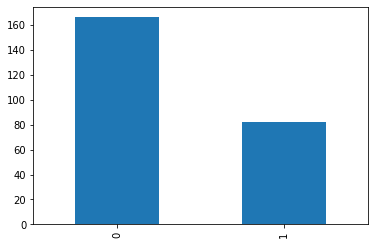

In [284]:
#Female population are 50% more than Male
df.male.value_counts().plot.bar()

In [285]:
df.age.describe()

count    248.000000
mean      28.879837
std       25.899359
min        0.032877
25%        6.000000
50%       15.500000
75%       55.000000
max       88.000000
Name: age, dtype: float64

Average age is 28. Min is 0.03 and Max is 88. Median being 15, the data seems to be right skewed

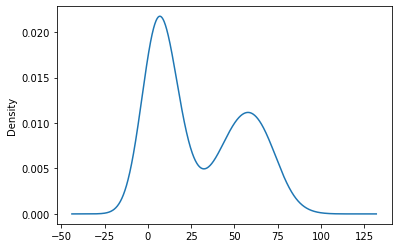

In [286]:
df.age.plot.density()

In [287]:
df.unmarried.value_counts()

1    140
0    108
Name: unmarried, dtype: int64

More Unmarried than married

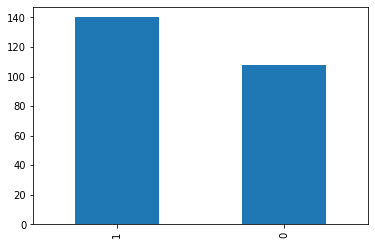

In [288]:
df.unmarried.value_counts().plot.bar()

In [289]:
df.achd.value_counts()

0    229
1     19
Name: achd, dtype: int64

In [290]:
df.cad_dvd.value_counts()

0    221
1     27
Name: cad_dvd, dtype: int64

In [291]:
df.cad_svd.value_counts()

0    246
1      2
Name: cad_svd, dtype: int64

Very Negligable number of records for cad_svd

In [292]:
df.cad_tvd.value_counts()

0    224
1     24
Name: cad_tvd, dtype: int64

In [293]:
df.cad_vsd.value_counts()

0    247
1      1
Name: cad_vsd, dtype: int64

Very negligable number of records for cad_vsd

In [294]:
df.os_asd.value_counts()

0    233
1     15
Name: os_asd, dtype: int64

In [295]:
df.other_heart.value_counts()

0    193
1     55
Name: other_heart, dtype: int64

In [296]:
df.other_respiratory.value_counts()

0    233
1     15
Name: other_respiratory, dtype: int64

In [297]:
df.other_general.value_counts()

0    247
1      1
Name: other_general, dtype: int64

Very negligable number of records for other_general

In [298]:
df.other_nervous.value_counts()

0    245
1      3
Name: other_nervous, dtype: int64

Very negligable number of records for other_nervous

In [299]:
df.other_tertalogy.value_counts()

0    230
1     18
Name: other_tertalogy, dtype: int64

In [300]:
df.pm_vsd.value_counts()

0    242
1      6
Name: pm_vsd, dtype: int64

In [301]:
df.rhd.value_counts()

0    222
1     26
Name: rhd, dtype: int64

We drop the features which are insignificant

In [302]:
df = df.drop(['cad_svd','cad_vsd','other_nervous','other_general'], axis=1)

In [303]:
df.shape

(248, 37)

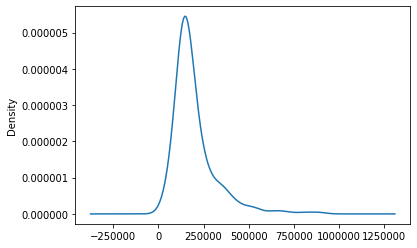

In [304]:
#Checking the distribution of total_cost variable
df.total_cost_to_hospital.plot.density()

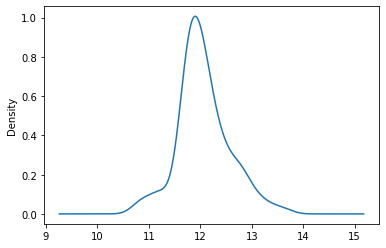

In [305]:
df.ln_total_cost.plot.density()

Near normal distribution

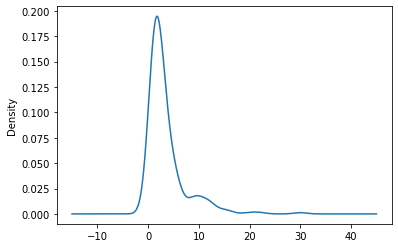

In [306]:
#We check the distribution of length of stay variables
df.length_of_stay_icu.plot.density()

Near Normal Distribution

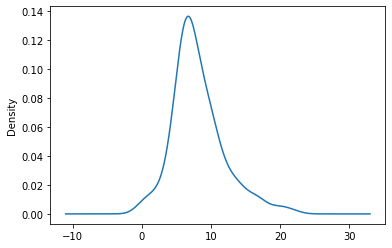

In [307]:
df.length_of_stay_ward.plot.density()

Normally distributed

In [308]:
df.body_weight.describe()

count    248.000000
mean      37.524677
std       23.118822
min        2.020000
25%       15.000000
50%       40.900000
75%       58.250000
max       85.000000
Name: body_weight, dtype: float64

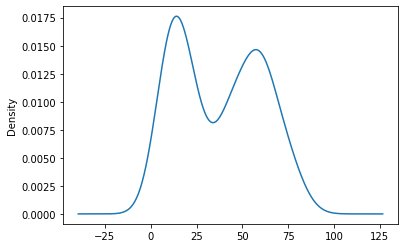

In [309]:
df.body_weight.plot.density()

In [310]:
#Combine weight and height to form bmi and drop the weight and height variables
df['bmi'] = df.body_weight / (df.body_height * df.body_height)* 10000
df = df.drop(['body_weight','body_height'], axis=1)
df.shape

(248, 36)

In [311]:
df.bmi.describe()

count    248.000000
mean      23.321399
std       30.231829
min        9.720294
25%       14.062361
50%       17.945551
75%       23.076466
max      404.432133
Name: bmi, dtype: float64

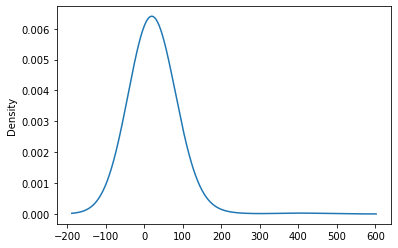

In [312]:
#Analyzing the bmi distribution
df.bmi.plot.kde(bw_method=2)

In [313]:
#Grouping bmi into categories
bins = [0,18.5,24.9,29.9,np.inf]
labels = ['Underweight','Normal','Overweight','Obese']
df['bmi'] = pd.cut(df['bmi'], bins, labels=labels)

In [314]:
df.bmi.value_counts()

Underweight    132
Normal          72
Overweight      25
Obese           19
Name: bmi, dtype: int64

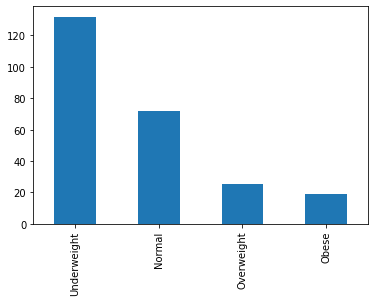

In [315]:
df.bmi.value_counts().plot.bar()

Bucketing the Age variable into categories

In [316]:
bins = [0,10,25,50,np.inf]
label = ['0','1','2','3']

df['age'] = pd.cut(df['age'], bins, labels=label)

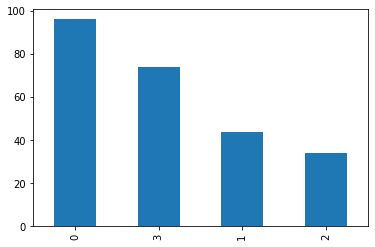

In [317]:
df.age.value_counts().plot.bar()
#More infants or children in the sample (below 10 years)

Export the data frame into a CSV file

In [318]:
df.to_csv('treated_data.csv', index = False)

# Checking for Interactions (Bivariate Assessment)

In [319]:
pd.crosstab(df.elective, df.ambulance)

ambulance,0,1
elective,,
0,2,30
1,216,0


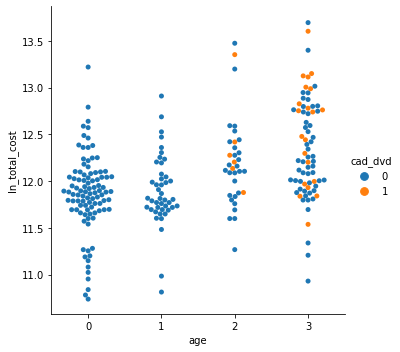

In [320]:
sn.catplot(x="age", y="ln_total_cost", hue="cad_dvd", kind="swarm", data=df)

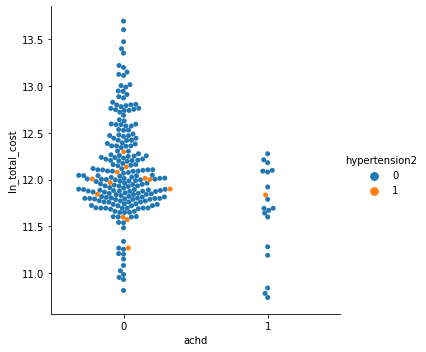

In [321]:
sn.catplot(x="achd", y="ln_total_cost", hue="hypertension2", kind="swarm", data=df)

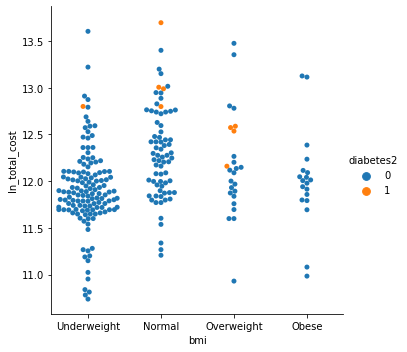

In [322]:
sn.catplot(x="bmi", y="ln_total_cost", hue="diabetes2", kind="swarm", data=df)

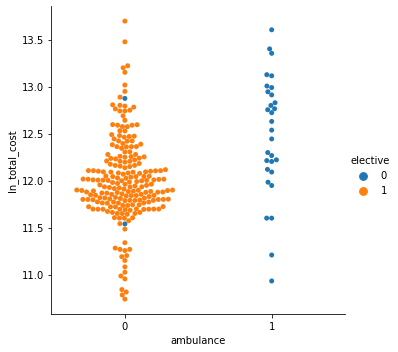

In [323]:
sn.catplot(x="ambulance",y="ln_total_cost", hue="elective", kind="swarm", data=df)

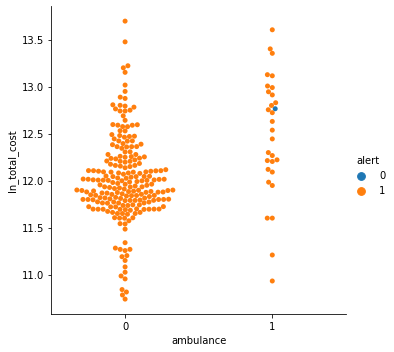

In [324]:
sn.catplot(x="ambulance",y="ln_total_cost", hue="alert", kind="swarm", data=df)

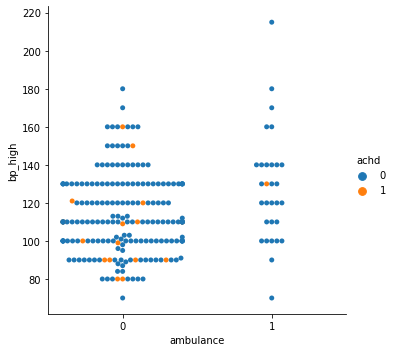

In [325]:
sn.catplot(x="ambulance",y="bp_high", hue="achd", kind="swarm", data=df)

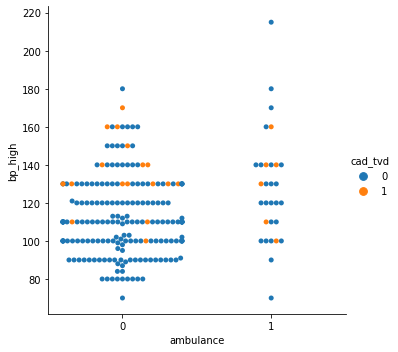

In [326]:
sn.catplot(x="ambulance",y="bp_high", hue="cad_tvd", kind="swarm", data=df)

In [220]:
#Chi-square Analysis
import scipy
from scipy.stats import chi2_contingency

In [221]:
tab1 = pd.crosstab(df.age, df.diabetes1)

In [225]:
chi2, pval, dof, expected = chi2_contingency(tab1.values)

In [226]:
pval

0.00032659094512881877

Correlation Matrix

In [331]:
df_num = df[['hr_pulse','bp_high','bp_low','rr','hb','urea','creatinine','total_cost_to_hospital','ln_total_cost',
            'length_of_stay_icu','length_of_stay_ward','cost_of_implant']]

In [332]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
hr_pulse                  248 non-null int64
bp_high                   225 non-null float64
bp_low                    225 non-null float64
rr                        248 non-null int64
hb                        246 non-null float64
urea                      235 non-null float64
creatinine                215 non-null float64
total_cost_to_hospital    248 non-null float64
ln_total_cost             248 non-null float64
length_of_stay_icu        248 non-null int64
length_of_stay_ward       248 non-null int64
cost_of_implant           248 non-null int64
dtypes: float64(7), int64(5)
memory usage: 23.4 KB


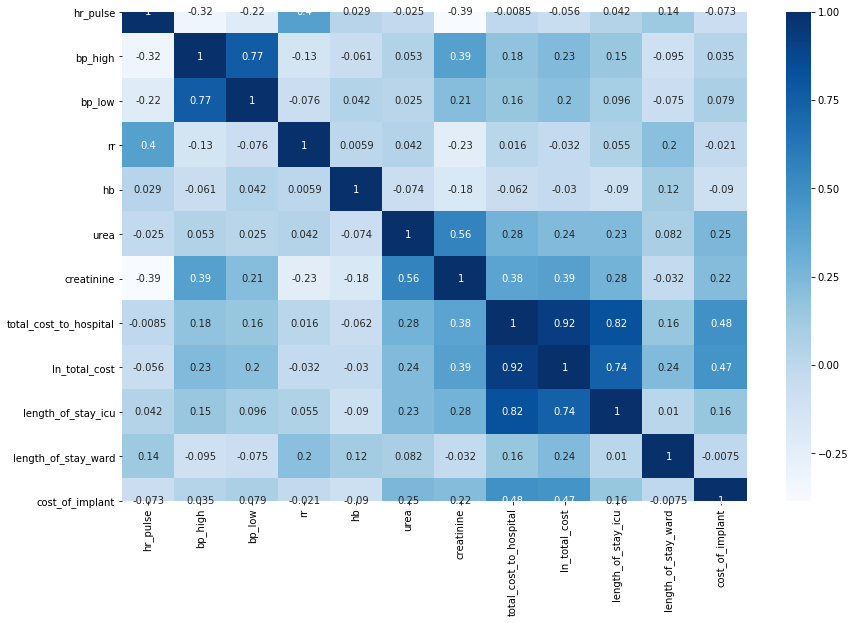

In [333]:
#Correlation Matrix
plt.figure(figsize=(14,9))
xy2 = sn.heatmap(df_num.corr(),cmap='Blues',annot=True) 

Export the dataframe into a csv file

In [224]:
df.to_csv('treated_data.csv', index = False)